In [2]:
import tensorflow as tf
from tensorflow import keras

Fashion MNIST number classification load

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images_full, train_labels_full), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
X_valid, X_train = train_images_full[:5000]/255, train_images_full[5000:]/255
y_valid, y_train = train_labels_full[:5000], train_labels_full[5000:]

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [6]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [7]:
history =  model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
1719/1719 [==============================] - 4s 1ms/step - loss: 0.7305 - accuracy: 0.7583 - val_loss: 0.5142 - val_accuracy: 0.8280
Epoch 2/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4916 - accuracy: 0.8294 - val_loss: 0.4848 - val_accuracy: 0.8286
Epoch 3/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4445 - accuracy: 0.8443 - val_loss: 0.4070 - val_accuracy: 0.8610
Epoch 4/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4161 - accuracy: 0.8554 - val_loss: 0.3996 - val_accuracy: 0.8616
Epoch 5/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3963 - accuracy: 0.8609 - val_loss: 0.4201 - val_accuracy: 0.8520
Epoch 6/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3814 - accuracy: 0.8671 - val_loss: 0.3875 - val_accuracy: 0.8666
Epoch 7/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3674 - accuracy: 0.8710 - val_loss: 0.3598 - val_accuracy:

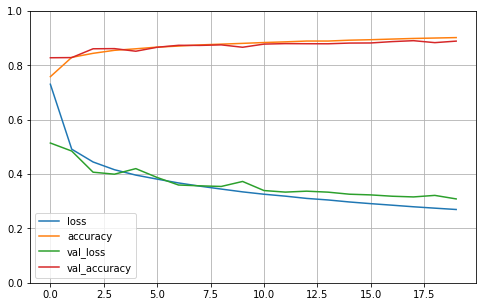

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [9]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 59.2554 - accuracy: 0.8474


[59.255401611328125, 0.8474000096321106]

Regression MLP on housing prices

In [10]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [12]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.7966 - val_loss: 0.9418
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6684 - val_loss: 0.4939
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4714 - val_loss: 0.4516
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4455 - val_loss: 0.4316
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4306 - val_loss: 0.4196
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4208 - val_loss: 0.4138
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4101 - val_loss: 0.4010
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4016 - val_loss: 0.3967
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3955 - val_loss: 0.3948
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3913 - val_loss: 0.3865

In [13]:
input_A = keras.layers.Input(shape=[5])
input_B = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(10, activation="relu")(input_B)
hidden2 = keras.layers.Dense(10, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=output)

model.compile(loss="mse", optimizer="sgd")

In [14]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20, 
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8764 - val_loss: 0.5164
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4967 - val_loss: 0.4578
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4570 - val_loss: 0.4396
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4407 - val_loss: 0.4360
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4312 - val_loss: 0.4237
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4247 - val_loss: 0.4236
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4236 - val_loss: 0.4159
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4164 - val_loss: 0.4102
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4130 - val_loss: 0.4150
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4106 - val_loss: 0.4170

In [16]:
input_A = keras.layers.Input(shape=[5])
input_B = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(10, activation="relu")(input_B)
hidden2 = keras.layers.Dense(10, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
aux_output = keras.layers.Dense(1)(hidden2)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

In [17]:
history = model.fit((X_train_A, X_train_B), [y_train, y_train], epochs=20,
                    validation_data=((X_valid_A, X_valid_B), [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.3832 - dense_14_loss: 1.2430 - dense_15_loss: 2.6451 - val_loss: 0.6572 - val_dense_14_loss: 0.5901 - val_dense_15_loss: 1.2608
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6349 - dense_14_loss: 0.5739 - dense_15_loss: 1.1831 - val_loss: 0.5865 - val_dense_14_loss: 0.5307 - val_dense_15_loss: 1.0884
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5715 - dense_14_loss: 0.5200 - dense_15_loss: 1.0354 - val_loss: 0.5385 - val_dense_14_loss: 0.4907 - val_dense_15_loss: 0.9692
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5299 - dense_14_loss: 0.4863 - dense_15_loss: 0.9224 - val_loss: 0.5121 - val_dense_14_loss: 0.4729 - val_dense_15_loss: 0.8651
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4999 - dense_14_loss: 0.4634 - dense_15_loss: 0.8284 - val_loss: 0.4779 - val_dense_14_loss: 0.4445 - val_de

In [18]:
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), [y_test, y_test])

162/162 [==============================] - 0s 2ms/step - loss: 0.4138 - dense_14_loss: 0.3948 - dense_15_loss: 0.5856


In [ ]:
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))